In [1]:
import tensorflow as tf

In [2]:
import os

In [3]:
categories=['Benign100','Malignant100']

data = []

# Loop through each category
for category in categories:
    path = os.path.join('train100', category)  # Assuming the folders are in the root of your Google Drive
    print(path)
    label = categories.index(category)
    print(label)

train100\Benign100
0
train100\Malignant100
1


In [3]:
import cv2

# Define the categories
categories=['Benign100','Malignant100']

data = []

# Loop through each category
for category in categories:
    path = os.path.join('train100', category)  # Assuming the folders are in the root of your Google Drive
    label = categories.index(category)

    # Loop through each file in the category folder
    for file in os.listdir(path):
        img_path = os.path.join(path, file)

        # Read the image
        img = cv2.imread(img_path)

        # Resize the image to 224x224
        try:
            img = cv2.resize(img, (224, 224))
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
            continue

        # Append the image and its label to the data list
        data.append([img, label])

# Now you have a list 'data' containing image-label pairs
# Each element of 'data' is a list [image, label], where 'image' is a numpy array and 'label' is an integer
# You can further process this data for your machine learning model


In [4]:
#how many images inthe dataset
len(data)

220

In [5]:
import random
random.shuffle(data)

In [6]:
#split the input
X=[]
Y=[]
for feature,label in data:
    X.append(feature)
    Y.append(label)

In [7]:
from collections import Counter

label_counts = Counter(Y)
print(label_counts)

Counter({0: 110, 1: 110})


In [8]:
len(X),len(Y)

(220, 220)

In [9]:
import numpy as np
#convert numpy array (x 2d and y 1d)
X=np.array(X)
Y=np.array(Y)

In [10]:
X.shape

(220, 224, 224, 3)

In [11]:
X.ndim

4

In [12]:
#scaler :min max scaler
#RGB (0-255,0-255,0-255)
X=X/255

In [13]:
from collections import Counter

label_counts = Counter(Y)
print(label_counts)

Counter({0: 110, 1: 110})


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
x_train.shape

(154, 224, 224, 3)

In [16]:
x_test.shape

(66, 224, 224, 3)

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
# CNN Model building
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                        activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [19]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
trained_model= model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15


5/5 [==============================] - 4s 562ms/step - loss: 29.3334 - accuracy: 0.4481 - val_loss: 25.0407 - val_accuracy: 0.4394
Epoch 2/15
5/5 [==============================] - 2s 492ms/step - loss: 11.3300 - accuracy: 0.5519 - val_loss: 2.9106 - val_accuracy: 0.5606
Epoch 3/15
5/5 [==============================] - 2s 476ms/step - loss: 3.0963 - accuracy: 0.4740 - val_loss: 1.3102 - val_accuracy: 0.4394
Epoch 4/15
5/5 [==============================] - 2s 483ms/step - loss: 1.6246 - accuracy: 0.5260 - val_loss: 0.9888 - val_accuracy: 0.4242
Epoch 5/15
5/5 [==============================] - 2s 488ms/step - loss: 1.0403 - accuracy: 0.5455 - val_loss: 0.7572 - val_accuracy: 0.6515
Epoch 6/15
5/5 [==============================] - 3s 528ms/step - loss: 0.9565 - accuracy: 0.5390 - val_loss: 0.5618 - val_accuracy: 0.7424
Epoch 7/15
5/5 [==============================] - 2s 490ms/step - loss: 0.6623 - accuracy: 0.7078 - val_loss: 0.7077 - val_accuracy: 0.6515
Epoch 8/15
5/5 

In [21]:
print("print train_loss and Train_accuarcay",model.evaluate(x_train,y_train))
print("print test_loss and Test_accuarcay",model.evaluate(x_test,y_test))

5/5 [==============================] - 0s 57ms/step - loss: 0.2719 - accuracy: 0.8831
print train_loss and Train_accuarcay [0.27189379930496216, 0.8831169009208679]
3/3 [==============================] - 0s 43ms/step - loss: 0.4728 - accuracy: 0.8485
print test_loss and Test_accuarcay [0.4728214144706726, 0.8484848737716675]


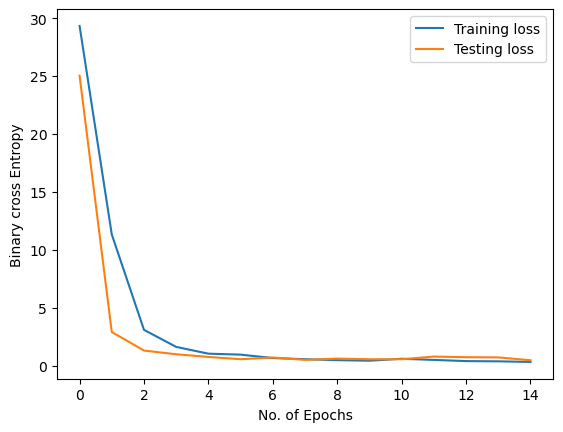

In [22]:
import matplotlib.pyplot as plt
plt.plot(trained_model.history['loss'],label='Training loss')
plt.plot(trained_model.history['val_loss'],label='Testing loss')
plt.xlabel("No. of Epochs")
plt.ylabel('Binary cross Entropy')
plt.legend()
plt.show()

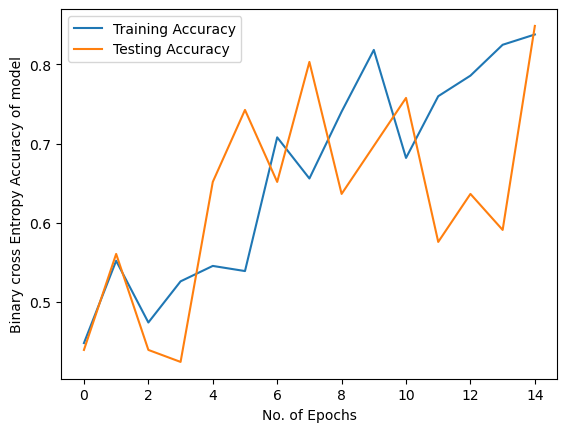

In [23]:
#visulisation of training and testing accuracy
plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel('Binary cross Entropy Accuracy of model')
plt.legend()
plt.show()

In [24]:
y_pred=model.predict(x_test)
y_pred

3/3 [==============================] - 0s 37ms/step


array([[0.39557546],
       [0.24776621],
       [0.8450835 ],
       [0.07756594],
       [0.02372544],
       [0.27115592],
       [0.03270687],
       [0.05051566],
       [0.8180627 ],
       [0.582468  ],
       [0.5137683 ],
       [0.8436064 ],
       [0.04675326],
       [0.03027824],
       [0.45535776],
       [0.69521713],
       [0.1697    ],
       [0.6437032 ],
       [0.8936659 ],
       [0.12858012],
       [0.9479705 ],
       [0.03234708],
       [0.4166601 ],
       [0.8147375 ],
       [0.90011084],
       [0.06471293],
       [0.92875105],
       [0.9531938 ],
       [0.04918664],
       [0.38359666],
       [0.12144105],
       [0.4773592 ],
       [0.599278  ],
       [0.1983125 ],
       [0.6315776 ],
       [0.10251111],
       [0.5606488 ],
       [0.5255797 ],
       [0.04378787],
       [0.14763916],
       [0.9044537 ],
       [0.72338635],
       [0.08638365],
       [0.69992125],
       [0.36606562],
       [0.44336912],
       [0.03593299],
       [0.021

In [25]:
y_pred=model.predict(x_test).round(2)
y_pred

3/3 [==============================] - 0s 44ms/step


array([[0.4 ],
       [0.25],
       [0.85],
       [0.08],
       [0.02],
       [0.27],
       [0.03],
       [0.05],
       [0.82],
       [0.58],
       [0.51],
       [0.84],
       [0.05],
       [0.03],
       [0.46],
       [0.7 ],
       [0.17],
       [0.64],
       [0.89],
       [0.13],
       [0.95],
       [0.03],
       [0.42],
       [0.81],
       [0.9 ],
       [0.06],
       [0.93],
       [0.95],
       [0.05],
       [0.38],
       [0.12],
       [0.48],
       [0.6 ],
       [0.2 ],
       [0.63],
       [0.1 ],
       [0.56],
       [0.53],
       [0.04],
       [0.15],
       [0.9 ],
       [0.72],
       [0.09],
       [0.7 ],
       [0.37],
       [0.44],
       [0.04],
       [0.02],
       [0.11],
       [0.04],
       [0.56],
       [0.92],
       [0.08],
       [0.59],
       [0.32],
       [0.75],
       [0.22],
       [0.8 ],
       [0.64],
       [0.02],
       [0.94],
       [0.51],
       [0.67],
       [0.97],
       [0.44],
       [0.58]], dtype=flo

In [26]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.94      0.78      0.85        37

    accuracy                           0.85        66
   macro avg       0.85      0.86      0.85        66
weighted avg       0.86      0.85      0.85        66



In [29]:
print(confusion_matrix(y_test,y_pred))

[[27  2]
 [ 8 29]]


In [31]:
import pickle

In [32]:
pickle.dump(model,open('model100-85.sav','wb'))

In [4]:
import cv2
import numpy as np

input_image = cv2.imread('6.jpg')

# cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resized/255
print(input_image_scaled)

input_image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
print(input_image_reshaped)
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
if input_prediction > 0.5:

    print("Benign")
else:
    print('Malignant')

[[[0.49803922 0.45882353 0.62745098]
  [0.50196078 0.4627451  0.63137255]
  [0.50196078 0.4627451  0.63137255]
  ...
  [0.39607843 0.37647059 0.55294118]
  [0.34509804 0.3254902  0.50196078]
  [0.36470588 0.34509804 0.52156863]]

 [[0.49411765 0.45490196 0.62352941]
  [0.49803922 0.45882353 0.62745098]
  [0.50196078 0.4627451  0.63137255]
  ...
  [0.36470588 0.34509804 0.52156863]
  [0.34117647 0.32156863 0.49803922]
  [0.37647059 0.35686275 0.53333333]]

 [[0.48627451 0.44705882 0.61568627]
  [0.49411765 0.45490196 0.62352941]
  [0.49803922 0.45882353 0.62745098]
  ...
  [0.35686275 0.32941176 0.50588235]
  [0.38039216 0.35294118 0.52941176]
  [0.40784314 0.38039216 0.55686275]]

 ...

 [[0.37647059 0.33333333 0.52941176]
  [0.38431373 0.34117647 0.5372549 ]
  [0.38823529 0.34509804 0.54117647]
  ...
  [0.40784314 0.39607843 0.57647059]
  [0.4        0.38823529 0.56862745]
  [0.39607843 0.38431373 0.56470588]]

 [[0.38039216 0.3372549  0.53333333]
  [0.38823529 0.34509804 0.54117647]


NameError: name 'model' is not defined

[[[0.71372549 0.54901961 0.56470588]
  [0.74901961 0.58431373 0.6       ]
  [0.75294118 0.58823529 0.60392157]
  ...
  [0.76862745 0.61176471 0.61568627]
  [0.75686275 0.6        0.60392157]
  [0.74509804 0.58823529 0.59215686]]

 [[0.78431373 0.62352941 0.63921569]
  [0.81960784 0.65882353 0.6745098 ]
  [0.82352941 0.6627451  0.67843137]
  ...
  [0.85098039 0.69411765 0.69803922]
  [0.83921569 0.68235294 0.68627451]
  [0.82745098 0.67058824 0.6745098 ]]

 [[0.76078431 0.60784314 0.61960784]
  [0.80392157 0.65098039 0.6627451 ]
  [0.80784314 0.65490196 0.66666667]
  ...
  [0.83529412 0.67843137 0.68235294]
  [0.82352941 0.66666667 0.67058824]
  [0.81176471 0.65490196 0.65882353]]

 ...

 [[0.7372549  0.61568627 0.60392157]
  [0.79607843 0.6745098  0.6627451 ]
  [0.81568627 0.68235294 0.6745098 ]
  ...
  [0.84313725 0.69019608 0.69411765]
  [0.83137255 0.67843137 0.68235294]
  [0.82745098 0.6745098  0.67843137]]

 [[0.73333333 0.61176471 0.6       ]
  [0.78823529 0.66666667 0.65490196]
